In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Simulated IoT data (replace with your actual data source)
iot_data = pd.DataFrame({
    'timestamp': pd.date_range(start='2024-01-01', periods=1000, freq='H'),
    'temperature': np.random.normal(25, 5, 1000),
    'humidity': np.random.normal(50, 10, 1000)
})

# Preprocessing
iot_data['hour'] = iot_data['timestamp'].dt.hour
iot_data['day_of_week'] = iot_data['timestamp'].dt.dayofweek

# Select features and target
features = ['temperature', 'humidity', 'hour', 'day_of_week']
target = 'temperature'

X = iot_data[features].values
y = iot_data[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/10


C:\Users\shraddhavasa\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 242.6826 - val_loss: 33.4875
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.9273 - val_loss: 15.9569
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.0982 - val_loss: 6.5854
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2675 - val_loss: 1.8663
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2241 - val_loss: 0.5665
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3696 - val_loss: 0.3029
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2395 - val_loss: 0.2093
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2168 - val_loss: 0.1524
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031 - val_loss: 0.1204
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0706 - val_loss: 0.0998
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218 
Test Loss: 0.02601822093129158


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Simulated IoT data (replace with your actual data source)
iot_data = pd.DataFrame({
    'timestamp': pd.date_range(start='2024-01-01', periods=1000, freq='H'),
    'temperature': np.random.normal(25, 5, 1000),
    'humidity': np.random.normal(50, 10, 1000)
})

# Preprocessing
iot_data['hour'] = iot_data['timestamp'].dt.hour
iot_data['day_of_week'] = iot_data['timestamp'].dt.dayofweek

# Select features and target
features = ['temperature', 'humidity', 'hour', 'day_of_week']
target = 'temperature'

X = iot_data[features].values
y = iot_data[target].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Reshape X to 3D for LSTM input
X = X.reshape(X.shape[0], 1, X.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/10


C:\Users\shraddhavasa\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 651.9561 - val_loss: 654.9779
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 636.2534 - val_loss: 648.8915
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 635.8956 - val_loss: 641.0607
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 633.4897 - val_loss: 630.8372
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 615.5844 - val_loss: 617.8263
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 597.9146 - val_loss: 601.4298
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 586.9578 - val_loss: 581.9739
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 577.2164 - val_loss: 559.0993
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 546.4800 - val_loss: 533.4731
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 515.6507 - val_loss: 505.4848
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 481.4139  
Test Loss: 487.31280517578125


Epoch 1/10


C:\Users\shraddhavasa\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 638.3430 - val_loss: 639.6549
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 631.6410 - val_loss: 634.0361
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 623.2213 - val_loss: 626.7048
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 615.3590 - val_loss: 617.0492
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 615.5294 - val_loss: 604.4841
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 606.9658 - val_loss: 588.6996
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 583.4390 - val_loss: 569.8440
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 564.2158 - val_loss: 548.0250
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 534.4632 - val_loss: 523.4906
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 506.1591 - val_loss: 496.7246
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 492.9409  
Test Loss: 496.73895263671875


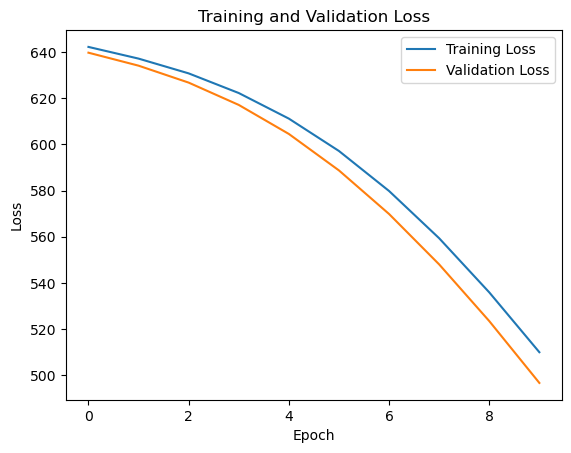

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


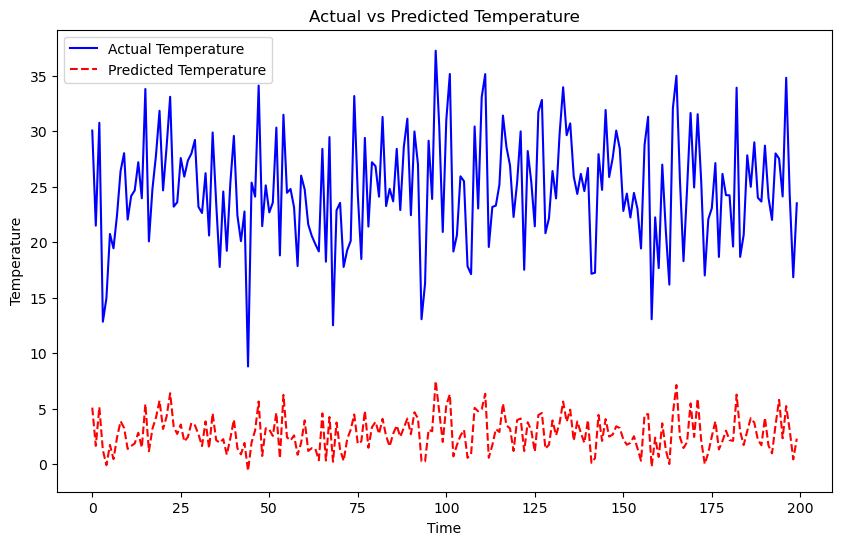

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Simulated IoT data (replace with your actual data source)
iot_data = pd.DataFrame({
    'timestamp': pd.date_range(start='2024-01-01', periods=1000, freq='H'),
    'temperature': np.random.normal(25, 5, 1000),
    'humidity': np.random.normal(50, 10, 1000)
})

# Preprocessing
iot_data['hour'] = iot_data['timestamp'].dt.hour
iot_data['day_of_week'] = iot_data['timestamp'].dt.dayofweek

# Select features and target
features = ['temperature', 'humidity', 'hour', 'day_of_week']
target = 'temperature'

X = iot_data[features].values
y = iot_data[target].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Reshape X to 3D for LSTM input
X = X.reshape(X.shape[0], 1, X.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted temperature
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Temperature', color='blue')
plt.plot(y_pred, label='Predicted Temperature', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()


Epoch 1/10


C:\Users\shraddhavasa\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3942 - loss: 1.0946 - val_accuracy: 0.6687 - val_loss: 1.0542
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 1.0358 - val_accuracy: 0.7000 - val_loss: 0.9989
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.9741 - val_accuracy: 0.7063 - val_loss: 0.9429
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7838 - loss: 0.9125 - val_accuracy: 0.6938 - val_loss: 0.8837
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7584 - loss: 0.8539 - val_accuracy: 0.6938 - val_loss: 0.8223
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7582 - loss: 0.7828 - val_accuracy: 0.6938 - val_loss: 0.7593
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7710 - loss: 0.7100 - val_accuracy: 0.7000 - val_loss: 0.6990
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7503 - loss: 0.6605 - val_accuracy: 0.7063 - val_loss: 0.6427
Ep

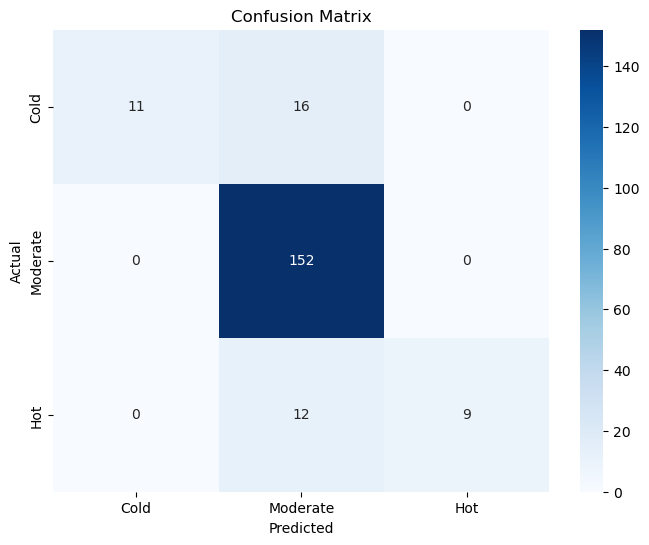

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated IoT data (replace with your actual data source)
iot_data = pd.DataFrame({
    'timestamp': pd.date_range(start='2024-01-01', periods=1000, freq='H'),
    'temperature': np.random.normal(25, 5, 1000),
    'humidity': np.random.normal(50, 10, 1000)
})

# Preprocessing
iot_data['hour'] = iot_data['timestamp'].dt.hour
iot_data['day_of_week'] = iot_data['timestamp'].dt.dayofweek

# Discretize temperature into categories
def categorize_temp(temp):
    if temp < 20:
        return 'Cold'
    elif temp < 30:
        return 'Moderate'
    else:
        return 'Hot'

iot_data['temp_category'] = iot_data['temperature'].apply(categorize_temp)

# Select features and target
features = ['temperature', 'humidity', 'hour', 'day_of_week']
target = 'temp_category'

X = iot_data[features].values
y = iot_data[target].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Reshape X to 3D for LSTM input
X = X.reshape(X.shape[0], 1, X.shape[1])

# Map categories to integers
category_map = {'Cold': 0, 'Moderate': 1, 'Hot': 2}
y = np.array([category_map[val] for val in y])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3, activation='softmax')  # 3 categories: Cold, Moderate, Hot
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=category_map.keys(), yticklabels=category_map.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
